In [1]:
import numpy as np
import h5py
import time
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
wide = np.load('/project/chihway/raulteixeira/data/BPZ+SOM_mcal_gold_wide_26x26_ids+cells+fluxes.npz')['arr_0']

In [3]:
wide = pd.DataFrame(wide)

In [4]:
wide.columns

Index(['COADD_OBJECT_ID', 'FLUX_R', 'FLUX_ERR_R', 'FLUX_I', 'FLUX_ERR_I',
       'FLUX_Z', 'FLUX_ERR_Z', 'cells', 'CHI_SQ', 'ID', 'M_0', 'ODDS', 'T_B',
       'T_ML', 'Z_B', 'Z_B_MAX', 'Z_B_MIN', 'Z_MEAN', 'Z_ML', 'Z_SAMP',
       'Z_SIG'],
      dtype='object')

In [5]:
len(wide)

47341776

In [6]:
cols = ['COADD_OBJECT_ID', 'cells'] + [f'FLUX_{band}' for band in ['R', 'I', 'Z']]\
+ [f'FLUX_ERR_{band}' for band in ['R', 'I', 'Z']]
cols

['COADD_OBJECT_ID',
 'cells',
 'FLUX_R',
 'FLUX_I',
 'FLUX_Z',
 'FLUX_ERR_R',
 'FLUX_ERR_I',
 'FLUX_ERR_Z']

In [7]:
def flux2mag(flux):
    return -2.5 * np.log10(flux) + 30

bands = ['R', 'I', 'Z']
for band in bands:
    wide[f'MAG_{band}']=flux2mag(wide[f'FLUX_{band}'])

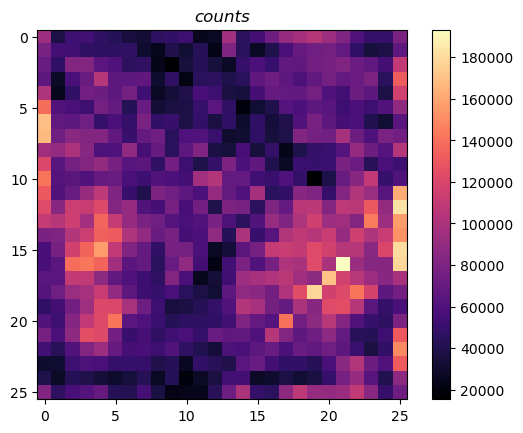

In [8]:
n=26
cmap='magma'
fun = 'len'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'counts'
square = wide[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_len = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_len, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

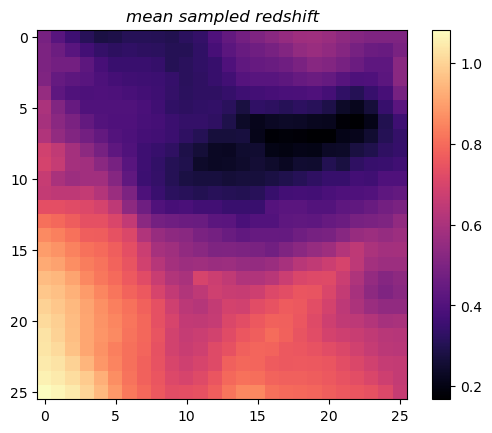

In [9]:
cmap='magma'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean sampled redshift'
square = wide[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_z = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_z, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

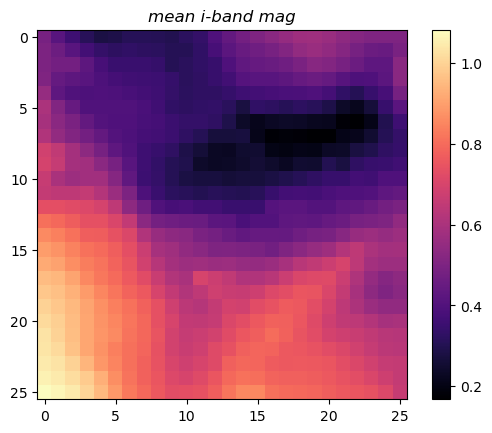

In [10]:
cmap='magma'
fun = 'mean'
feat = 'MAG_I'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean i-band mag'
square = wide[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_i = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_z, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

In [11]:
ids = np.argsort(im_z.flatten())

In [12]:
percentages = im_len.flatten()[ids].cumsum()/len(wide)

In [14]:
TomoBin4cell = np.empty(n**2)
for i, mask in enumerate(masks):
    TomoBin4cell[mask]=i+1

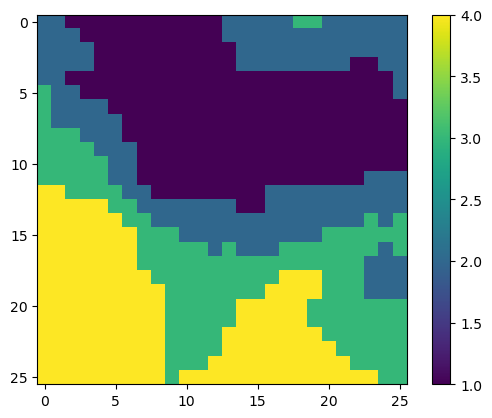

In [20]:
plt.imshow(TomoBin4cell.reshape(n,n))

In [34]:
np.save('/project/chihway/raulteixeira/data/TomoBin4WideCell_100323.npy', TomoBin4cell.astype(int))

In [35]:
cell2TomoBin = np.load('/project/chihway/raulteixeira/data/TomoBin4WideCell_100323.npy')

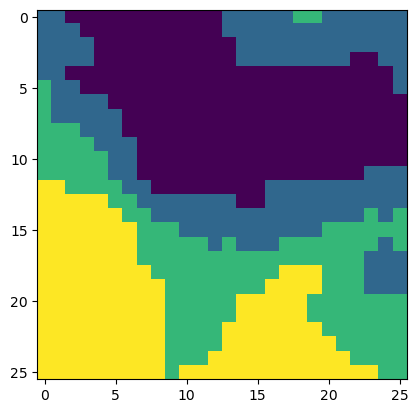

In [38]:
plt.imshow(cell2TomoBin.reshape(n,n))

In [32]:
random_cells = np.random.randint(0, n**2, n**2)

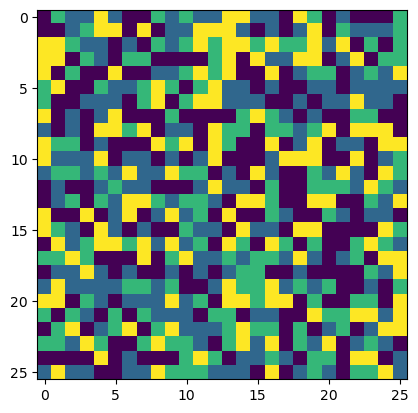

In [33]:
plt.imshow(TomoBin4cell[random_cells].reshape(n,n))

In [15]:
[len(mask) for mask in masks]

[213, 156, 146, 161]

In [16]:
sum_=0
for mask in masks:
    iv_ =im_len.flatten()[mask].sum()
    print(iv_)
    sum_+=iv_
print(sum_)

11793578
11859295
11797811
11891092
47341776


In [17]:
cmap='Set1'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'tomographic bins'
#square = df[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im = np.zeros(n**2)

for i, mask in enumerate(masks):
    im[mask] = (i+1)
    
im = im

In [18]:
np.arange(len(wide))[np.isin(wide.cells, mask)]

array([       1,        6,        7, ..., 47341763, 47341767, 47341775])

In [19]:
widerange = np.arange(26**2)
wide['TomoBin']=0
for i, mask in enumerate(masks):
    wide.loc[np.arange(len(wide))[np.isin(wide.cells, mask)], 'TomoBin'] = i+1

In [20]:
np.isin(wide.cells, mask).sum()

11891092

In [21]:
wide['TomoBin']

0           1
1           4
2           1
3           1
4           2
           ..
47341771    3
47341772    2
47341773    3
47341774    2
47341775    4
Name: TomoBin, Length: 47341776, dtype: int64

In [22]:
wide['TomoBin'].sum()

118469969

In [23]:
to_be_pd = [wide[col].values for col in wide.columns]
col_n_dtype = [(col, wide[col].dtype) for col in wide.columns]

wide_arr = np.rec.array(to_be_pd, dtype=col_n_dtype)

In [24]:
len(wide_arr)

47341776

In [25]:
#np.savez('/project/chihway/raulteixeira/data/BPZ+SOM_mcal_gold_wide_26x26_ids+cells+fluxes_TomoBins.npz', wide_arr)

In [26]:
ids.size==n**2

True

In [27]:
#np.savez('/project/chihway/raulteixeira/data/TomoBins_cell_wide_26x26.npz', bin0_cells=masks[0], bin1_cells=masks[1], bin2_cells=masks[2], bin3_cells=masks[3])



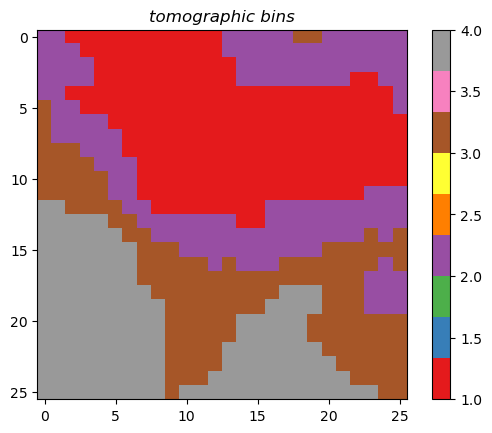

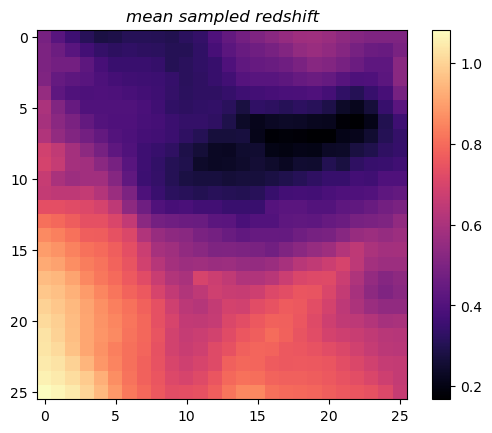

In [28]:
cmap='Set1'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'tomographic bins'
#square = df[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im = np.zeros(n**2)

for i, mask in enumerate(masks):
    im[mask] = (i+1)
    
im = im.reshape(n,n)

image = plt.imshow(im, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

cmap='magma'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean sampled redshift'
square = wide[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_z = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_z, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

In [29]:
zsamps = []
for mask in masks:
    zsamps.append(wide['Z_SAMP'][np.isin(wide.cells, mask)])
 

In [30]:
len(zsamps)

4

In [32]:
small_bins = [0.98492462, 0.99497487,
       1.00502513, 1.01507538]

0
1
2
3


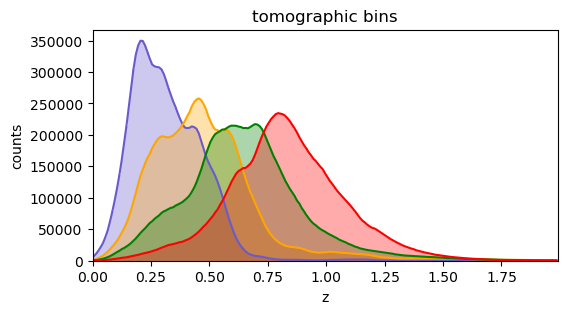

In [33]:
plt.figure(figsize=(6,3))
plt.title('tomographic bins')
plt.xlabel('z')
plt.ylabel('counts')
#plt.yscale('log')

colors = ['slateblue', 'orange', 'green', 'red']
n_bin = 200
for i, zsamp in enumerate(zsamps):
#     zsamp = df['Z_SAMP'][np.isin(df['cells'], mask)]
#     zsamps.append(zsamp) np.linspace(0,2,201)
    print(i)
    bins = np.arange(0,2,0.01)[::1] #small_bins # np.linspace(0,2,200) #np.arange(0.005,3.515,0.01)
    plt.xlim(bins[0], bins[-1])
    n_bin=len(bins)
    hist = plt.hist(zsamp, alpha=.33, bins=bins, color=colors[i])
    bin_c = np.array([(hist[1][i]+hist[1][i+1])/2 for i in range(n_bin-1)])
    plt.plot(bin_c, hist[0], c=colors[i])
plt.show()

In [53]:
zsamp

1           0.835
6           1.105
7           0.515
8           0.945
9           0.765
            ...  
47341752    0.905
47341760    1.055
47341763    1.215
47341767    0.685
47341775    1.365
Name: Z_SAMP, Length: 11891092, dtype: float32

In [34]:
plt.hist(zsamp)

(array([3.09000e+02, 0.00000e+00, 4.30000e+02, 6.49000e+02, 1.95700e+03,
        1.42500e+03, 0.00000e+00, 1.83500e+03, 5.18600e+03, 3.41400e+03,
        0.00000e+00, 3.89100e+03, 4.56100e+03, 1.04760e+04, 0.00000e+00,
        6.29400e+03, 1.48080e+04, 0.00000e+00, 1.77150e+04, 1.03760e+04,
        0.00000e+00, 2.35640e+04, 1.31300e+04, 0.00000e+00, 2.91770e+04,
        1.61750e+04, 0.00000e+00, 3.66290e+04, 2.06880e+04, 0.00000e+00,
        4.54050e+04, 2.49520e+04, 0.00000e+00, 5.20440e+04, 2.74080e+04,
        0.00000e+00, 2.84430e+04, 5.98030e+04, 0.00000e+00, 3.19210e+04,
        6.83770e+04, 0.00000e+00, 3.73870e+04, 8.32530e+04, 0.00000e+00,
        4.63460e+04, 1.04458e+05, 0.00000e+00, 5.77270e+04, 1.29089e+05,
        7.11260e+04, 7.66980e+04, 0.00000e+00, 8.13660e+04, 8.82870e+04,
        1.96170e+05, 1.09486e+05, 1.17417e+05, 0.00000e+00, 1.25643e+05,
        1.32045e+05, 1.38635e+05, 2.87394e+05, 1.47260e+05, 1.47557e+05,
        0.00000e+00, 1.50571e+05, 1.54117e+05, 3.27

In [32]:
fnames1.remove('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_ALL_v2.h5')

NameError: name 'fnames1' is not defined

In [ ]:
for i in range(1,50):
    print(f'{i:02}')
    bdf_df = pd.read_hdf(f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_0000{i:02}.h5') 
    print(len(bdf_df))

In [ ]:
for i in range(1,50):
    fname1 = f'/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_{i:02}_v2.h5'
    print(fname1)
    fname2 = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_{i:02}.h5'
    print(fname2)
    f2 = h5py.File(fname2)
    print('a')
    len2 = np.array(f2['df/block1_values']).shape[0]
    print('b')
    f1 = h5py.File(fname1)
    print('c')
    len1 = len(f1['ID'])
    print('d')
    if len2!=len1:
        print(i, len2, len1)

In [ ]:
fnames2.remove('/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_01_2e5.h5')

In [ ]:
len(fnames2)

In [ ]:
fnames1 = glob.glob(f'/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_*v2.h5')
fnames2 = glob.glob(f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_*.h5')

# dfs = []

# for fname in fnames:
    
#     df = pd.DataFrame()
#     file = h5py.File(fname)

#     data={}

#     for key in file.keys():
#         if key=='ID':
#             data['COADD_OBJECT_ID']=np.array(file[key])
#         else: data[key]=np.array(file[key])
            
#     for key in data:
#         df[key]=data[key]
        
#     dfs.append(df)

# bpzres = pd.concat(dfs)

# bpzres

#bpzres.to_hdf('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_ALL_v2.h5', key='df')

In [ ]:
lst = np.array([fname.split('_')[-2] for fname in fnames])

In [ ]:
np.sort(lst[lst!='ALL'].astype(int))

In [ ]:
bpzres = pd.read_hdf('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_ALL.h5', key='df')

np.load('/project2/chihway/raulteixeira/data/som_delve_48_48_MaskV3.npy')

cells = np.load('/project2/chihway/raulteixeira/data/som_delve_48x48_1e6.npz')['cells']

df = pd.read_csv('/project2/chihway/raulteixeira/data/metacal_fluxes+ids_V3_1e6_seed42.csv.gz')
df['cells']=cells

In [ ]:
bdf_df = pd.read_hdf(f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_000049.h5')

In [ ]:
bdf_df.columns

In [ ]:
#df = pd.read_csv('/project2/chihway/raulteixeira/data/metacal_fluxes+ids_V3_1e6_seed42.csv.gz')

In [ ]:
bpzres_SOM = pd.read_hdf('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_SOM_BDF_HDFN_CWWSB4_ALL_v2.h5')

In [ ]:
#df = df.merge(bpzres_SOM, on='COADD_OBJECT_ID')

In [ ]:
def flux2mag(flux):
    return -2.5 * np.log10(flux) + 30

bands = ['R', 'I', 'Z']
for band in bands:
    bpzres_SOM[f'MAG_{band}']=flux2mag(bpzres_SOM[f'FLUX_{band}'])

In [ ]:
bpzres_SOM['R-I']=bpzres_SOM['MAG_R']-bpzres_SOM['MAG_I']
bpzres_SOM['I-Z']=bpzres_SOM['MAG_I']-bpzres_SOM['MAG_Z']

In [ ]:
bpzres_SOM.columns

In [ ]:
bpzres_SOM

In [ ]:
len(bpzres_SOM)

In [ ]:
plt.hist(bpzres_SOM.Z_B.values, bins=50)
plt.xlabel('BPZ MAP redshift')
plt.ylabel('Counts')
plt.show()

In [ ]:
tomo_bin_edges = [0.2, 0.43, 0.63, 0.9, 1.3]
tomo_masks = [(tomo_bin_edges[i]<bpzres_SOM.Z_MEAN.values)&(bpzres_SOM.Z_MEAN.values<tomo_bin_edges[i+1])\
              for i in range(4)]

In [ ]:
tomo_masks

In [ ]:
plt.figure()
for i, mask in enumerate(tomo_masks):
    plt.hist(bpzres_SOM.Z_SAMP.values[mask], bins=75, histtype='step',\
             label=f'{tomo_bin_edges[i]:.02}<mean z<{tomo_bin_edges[i+1]:.02}')
    
plt.ylabel('counts')
plt.xlabel('Sampled Redshift')
plt.legend()
plt.show()

In [ ]:
n=48
cmap='magma'
fun = 'mean'
feat = 'Z_B'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean redshift (out of BPZ MAP redshifts)'
square = bpzres_SOM[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')

In [ ]:
plt.scatter(bpzres_SOM.Z_B.values[:10000], bpzres_SOM.MAG_I.values[:10000], s=.1)

In [ ]:
cell_list = np.unique(bpzres_SOM.cells)

In [ ]:
cell_mask = (im>.6).flatten()

high_z_cells = cell_list[cell_mask]

In [ ]:
for cell in high_z_cells[[1, 60, 34, 9, 503, 713, 38, 285]]:
    plt.hist(bpzres_SOM.loc[bpzres_SOM['cells']==cell, 'Z_SAMP'], bins=50)
    plt.title(f'cell #{cell}')
    plt.xlabel('Sampled redshift')
    plt.ylabel('Counts')
    plt.show()